In [115]:
import numpy as np
import pandas as pd

import matplotlib
from matplotlib import patheffects as pe
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

import regex as re

from tqdm import tqdm_pandas
from tqdm.notebook import trange, tqdm

import tqdm

from collections import defaultdict, namedtuple

plt.rcParams["figure.figsize"] = (15, 10)
pd.set_option('display.max_colwidth', 100)

## Show some statistics on data

In [116]:
df = pd.read_csv('data/full_df_v_0.1.csv')

In [117]:
df.sample(7)

,phrase,category,source,source_type,full_source
7796,"Насыпаў як завязаць. \nГ. зн. поўна, да верху, пад завязку.",ПАРАЎНАННІ,Алесь Зайка. Прыказкі і прымаўкі з Косаўшчыны,book,"Алесь Зайка. Прыказкі і прымаўкі з Косаўшчыны, page 247"
7838,"Маўчыць як мыла з'еўшы. \n“Папаўся на крадзяжы, дапытваюцца, нашто браў, а ён маўчыць як мыла зь...",ПАРАЎНАННІ,Алесь Зайка. Прыказкі і прымаўкі з Косаўшчыны,book,"Алесь Зайка. Прыказкі і прымаўкі з Косаўшчыны, page 243"
3298,"Поп у царкве пяець, а пападдзя бліны пячэць.","ПОП, КСЕНДЗ. ЦАРКОУНЫЯ СЛУЖКІ",Беларуская народная творчасць. Прыказкі і прымаўкі. У дзьвюх кнігах,book,Беларуская народная творчасць. Прыказкі і прымаўкі. У дзьвюх кнігах
2018,"Калі доўгу з добрым словам не аддасі, на тым свеце не вазьму гарачых угаллеў— i не прасі.",ГАНДАЛЬ. ГРОШЫ. ПАЗЫКІ. ДАУГІ. КАРЧМА,Беларуская народная творчасць. Прыказкі і прымаўкі. У дзьвюх кнігах,book,Беларуская народная творчасць. Прыказкі і прымаўкі. У дзьвюх кнігах
2643,"Хвалі хлеб у свірнё, a ліхадзея ў труне.","КАРОЛЬ, ЦАР. ПАНЫ, ПАДПАНКІ, ШЛЯХТА. ПРЫГОН, МУЖЫКІ",Беларуская народная творчасць. Прыказкі і прымаўкі. У дзьвюх кнігах,book,Беларуская народная творчасць. Прыказкі і прымаўкі. У дзьвюх кнігах
5959,"Па пары ложак многа, ды есці няма чога.",ХАРЧАВАННЕ,Беларуская народная творчасць. Прыказкі і прымаўкі. У дзьвюх кнігах,book,Беларуская народная творчасць. Прыказкі і прымаўкі. У дзьвюх кнігах
9481,"Шкадуй дзіця, як душу, а трасі, як грушу. \nШкадуй дзіця, але не давай яму праводзіць час марна,...",ПРЫКАЗКІ І ПРЫМАЎКІ,Алесь Зайка. Прыказкі і прымаўкі з Косаўшчыны,book,"Алесь Зайка. Прыказкі і прымаўкі з Косаўшчыны, page 117"


In [118]:
for u in df.source.unique(
):
    print(u)

svaboda.org
nlb.by
dumki.org
Беларуская народная творчасць. Прыказкі і прымаўкі. У дзьвюх кнігах
Алесь Зайка. Прыказкі і прымаўкі з Косаўшчыны


### ydata-profiling

In [119]:
#!pip install ydata-profiling

In [120]:
from ydata_profiling import ProfileReport

In [121]:
profile = ProfileReport(df, title="Pandas Profiling Report")
profile.to_file('report_for_full_df_v_0.1.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### vanilla python exploratory analysis

#### source and source_type variables

In [122]:
# sourc_relations = df
source_circles = df.groupby(['source_type', 'source'], as_index=False)['phrase'].count().rename(columns={'phrase': 'entries'})
source_circles['source_type'] = source_circles['source_type'].apply(lambda x: 'кніга' if x == 'book' else 'вэб-старонка')
source_circles

,source_type,source,entries
0,кніга,Алесь Зайка. Прыказкі і прымаўкі з Косаўшчыны,3032
1,кніга,Беларуская народная творчасць. Прыказкі і прымаўкі. У дзьвюх кнігах,5764
2,вэб-старонка,dumki.org,682
3,вэб-старонка,nlb.by,101
4,вэб-старонка,svaboda.org,76


In [123]:
source_circles.loc[1, 'source'] = 'Беларуская народная творчасць. Прыказкі і прымаўкі. У дзьвюх кнігах'

In [124]:
palette_name = 'Set2'
sns.set_palette(palette_name, desat=1)
sns.color_palette(palette_name)

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

In [125]:
by_source_type = source_circles.groupby('source_type')['entries'].sum()
by_source_type

source_type
вэб-старонка     859
кніга           8796
Name: entries, dtype: int64

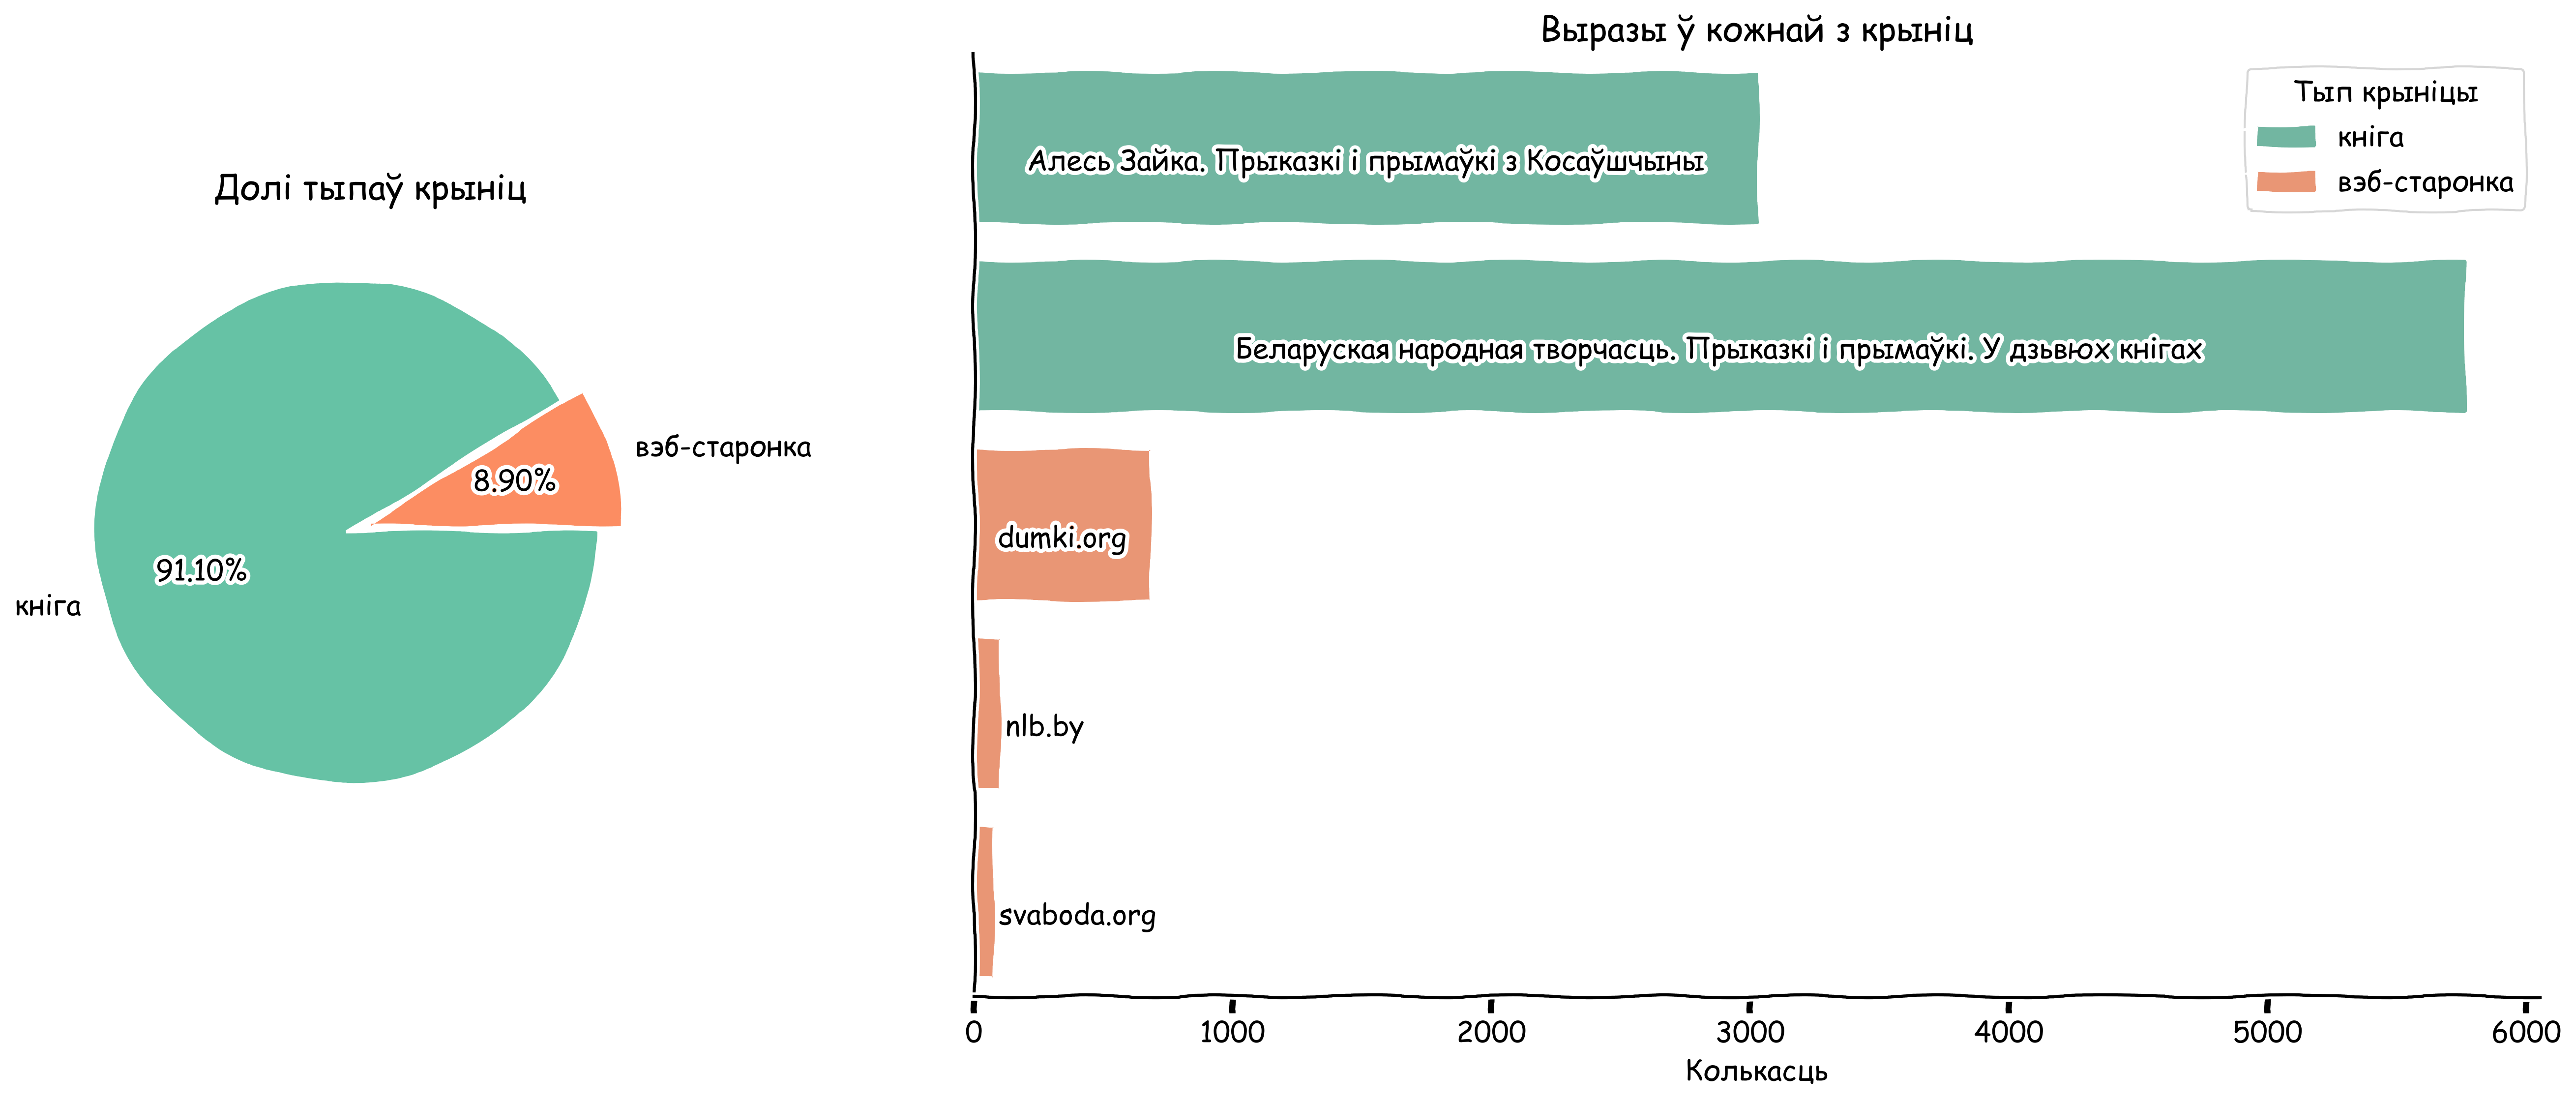

In [142]:
with plt.xkcd(scale=3, length=2000, randomness=50):
    # fig = plt.figure()
    fig, axes = plt.subplots(1, 2, figsize=(20, 10), gridspec_kw={'width_ratios': [1, 2.5]})
    fig.dpi = 300

    ax = axes[0]
    ax.pie(by_source_type,
        labels=by_source_type.index,
        # labeldistance=1.3,
        autopct='%1.2f%%',
        explode=[0, 0.1],
        colors=reversed(sns.color_palette()[:2]),
       )
    cmap = plt.get_cmap()
    ax.set_title('Долі тыпаў крыніц')

    
    ax = axes[1]
    sns.barplot(source_circles, y='source', x='entries', 
                     hue='source_type',
                     dodge=False,
                     ax=ax
              )
    ax.set_ylabel(None)
    ax.set_xlabel('Колькасць')
    ax.set_yticklabels([])
    ax.set_yticks([])
    ax.legend(title='Тып крыніцы')
    
    for i, (v, l) in enumerate(zip(source_circles['entries'],source_circles['source'])):
        if v > 500:
            ax.text(v/2, i, l, ha='center', va='top', color='black', fontsize=14)
        else:
            ax.text(v+20, i, l, ha='left', va='top', color='black', fontsize=14)

    ax.spines.top.set_visible(False)
    ax.spines.right.set_visible(False)
    ax.set_title('Выразы ў кожнай з крыніц')
    
    
    plt.tight_layout(pad=7.0, w_pad=5.0, h_pad=5.0)
    
    fig.savefig('imgs/general_stats.png', 
                dpi=200,
                transparent=True,
                metadata={'author': "https://github.com/aulasau"})

#### categories exploration

In [128]:
def draw_squarified_webpages(quotes_amount, colormap=matplotlib.cm.Wistia, axes=None):
    ## SO MUCH HARDCODE, NOT GOOD
    # fig = plt.figure()
    # fig.dpi = 300
    
    cmap = colormap
    mini=min(quotes_amount)
    maxi=max(quotes_amount)
    norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
    colors = [cmap(norm(value)) for value in quotes_amount]
    
    labels = []
    for lbl, val in quotes_amount.items():
        label = f'{lbl} [{val}]'
        if len(label) >= 20:
            label = '\n'.join(label.split(' '))
        
        labels.append(label)
    
    # with plt.xkcd(scale=5, length=1500, randomness=30):
    ax = squarify.plot(
        quotes_amount,
        # label=labels,
        ax=axes,
        color=colors,
    )
    for patch, value, label in zip(ax.patches, quotes_amount.values, labels):
        left, bottom, width, height = patch.get_bbox().bounds
        
        if value > 47:
            label_size = 20
        elif value > 10:
            label_size = 12
        elif value > 3:
            label_size = 7
        elif value > 2:
            label_size = 4
        else:
            label_size = 3
            ax.annotate(
                    label,
                    xy=(left+width/2, 
                        bottom+height/2),
                    ha='center',
                    va='center',
                    rotation=0,
                    fontsize=label_size,

                    path_effects=[pe.withStroke(linewidth=1, foreground='white')]
            )
            # patch.set_backgroundcolor('none')
            continue
        
        # label_size = width * 29 * 0.3 / len(label)
        
        ax.annotate(
                    label,
                    xy=(left+width/2, 
                        bottom+height/2),
                    ha='center',
                    va='center',
                    rotation=0,
                    fontsize=label_size)
        
    ax.set_title('Катэгорыі з вэб-старонак. Па сутнасці аўтары цытат')
    ax.axis('off')

# categories_amount = df.groupby(['source_type', 'category'])['phrase'].count().reset_index()
# categories_amount
# quotes_amount = categories_amount[categories_amount.source_type == 'webpage'][['category', 'phrase']]
# quotes_amount = quotes_amount.set_index('category')['phrase']
# quotes_amount = quotes_amount.sort_values(ascending=False)
# draw_squarified_webpages(quotes_amount, matplotlib.cm.Wistia)

#### bnt_squares

In [129]:
def draw_squarified_bnt(quotes_amount, colormap=matplotlib.cm.summer_r, axes=None):    
    ## SO MUCH HARDCODE, NOT GOOD
    # fig = plt.figure()
    # fig.dpi = 300
    
    cmap = colormap
    mini=min(quotes_amount)
    maxi=max(quotes_amount)
    norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
    colors = [cmap(norm(value)) for value in quotes_amount]
    
    labels = []
    for lbl, val in quotes_amount.items():
        label = f'{lbl} [{val}]'
        if len(label) >= 25:
            label = '\n'.join(label.split(' '))
        
        labels.append(label)
    
    
    # with plt.xkcd(scale=5, length=1500, randomness=30):
    ax = squarify.plot(
        quotes_amount,
        # label=labels,
        ax=axes,
        color=colors,
    )

    for patch, value, label in zip(ax.patches, quotes_amount.values, labels):
        left, bottom, width, height = patch.get_bbox().bounds
        
        if value > 400:
            label_size = 20
        elif value > 220:
            label_size = 12
        elif value > 100:
            label_size = 8
        elif value > 50:
            label_size = 5
        else:
            label_size = 2
            ax.annotate(
                    label,
                    xy=(left+width/2, 
                        bottom+height/2),
                    ha='center',
                    va='center',
                    rotation=0,
                    fontsize=label_size,

                    path_effects=[pe.withStroke(linewidth=1, foreground='white')]
            )
            # patch.set_backgroundcolor('none')
            continue
        
        # label_size = width * 29 * 0.3 / len(label)
        
        ax.annotate(
                    label,
                    xy=(left+width/2, 
                        bottom+height/2),
                    ha='center',
                    va='center',
                    rotation=0,
                    fontsize=label_size)
        
    ax.set_title('Катэгорыі ў кнізе "Беларуская народная творчасць. Прыказкі і прымаўкі."')
    ax.axis('off')

# categories_amount = df.groupby(['source', 'category'])['phrase'].count().reset_index()
# categories_amount

# quotes_amount = categories_amount[categories_amount.source.str.contains('народная творчасць')][['category', 'phrase']]
# quotes_amount = quotes_amount.set_index('category')['phrase']
# quotes_amount = quotes_amount.sort_values(ascending=False)
# draw_squarified_bnt(quotes_amount)

#### cosaushchyna_squares

In [130]:
def draw_squarified_zajka(quotes_amount, colormap=matplotlib.cm.GnBu, axes=None):    
    ## SO MUCH HARDCODE, NOT GOOD
    # fig = plt.figure()
    # fig.dpi = 300
    
    cmap = colormap
    mini=min(quotes_amount)
    maxi=max(quotes_amount)
    norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
    colors = [cmap(norm(value)) for value in quotes_amount]
    
    labels = []
    for lbl, val in quotes_amount.items():
        label = f'{lbl} [{val}]'
        if len(label) >= 30:
            label = '\n'.join(label.split(' '))
        
        labels.append(label)
    
    
    # with plt.xkcd(scale=5, length=1500, randomness=30):
    ax = squarify.plot(
        quotes_amount,
        # label=labels,
        ax=axes,
        color=colors,
    )

    for patch, value, label in zip(ax.patches, quotes_amount.values, labels):
        left, bottom, width, height = patch.get_bbox().bounds
        
        if value > 400:
            label_size = 25
        elif value > 180:
            label_size = 18
        elif value > 40:
            label_size = 10
        elif value > 10:
            label_size = 7
        else:
            label_size = 4
            ax.annotate(
                    label,
                    xy=(left+width/2, 
                        bottom+height/2),
                    ha='center',
                    va='center',
                    rotation=0,
                    fontsize=label_size,

                    path_effects=[pe.withStroke(linewidth=1, foreground='white')]
            )
            # patch.set_backgroundcolor('none')
            continue
        
        # label_size = width * 29 * 0.3 / len(label)
        
        ax.annotate(
                    label,
                    xy=(left+width/2, 
                        bottom+height/2),
                    ha='center',
                    va='center',
                    rotation=0,
                    fontsize=label_size)
        
    ax.set_title('Катэгорыі ў кнізе "Алесь Зайка. Прыказкі і прымаўкі Косаўшчыны."')
    ax.axis('off')

# categories_amount = df.groupby(['source', 'category'])['phrase'].count().reset_index()
# categories_amount
# quotes_amount = categories_amount[categories_amount.source.str.contains('Косаўшчыны')][['category', 'phrase']]
# quotes_amount = quotes_amount.set_index('category')['phrase']
# quotes_amount = quotes_amount.sort_values(ascending=False)
# draw_squarified_zajka(quotes_amount)

#### all on one plot

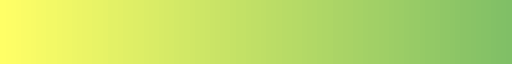

In [131]:
from matplotlib.colors import LinearSegmentedColormap, ListedColormap

# Get the existing colormap
cmap = matplotlib.cm.summer

# Define the subset of the colormap you want to extract
start = 0.5
end = 1
n = 100
new_cmap = ListedColormap(cmap(np.linspace(end, start, n)))
new_cmap

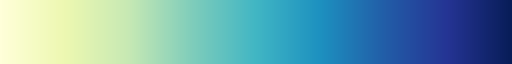

In [132]:
matplotlib.cm.YlGnBu

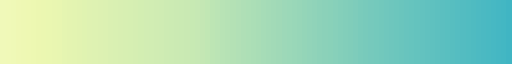

In [133]:
cmap = matplotlib.cm.YlGnBu

# Define the subset of the colormap you want to extract
start = 0.1
end = 0.5
n = 100
new_cmap_zajka = ListedColormap(cmap(np.linspace(start, end, n)))
new_cmap_zajka

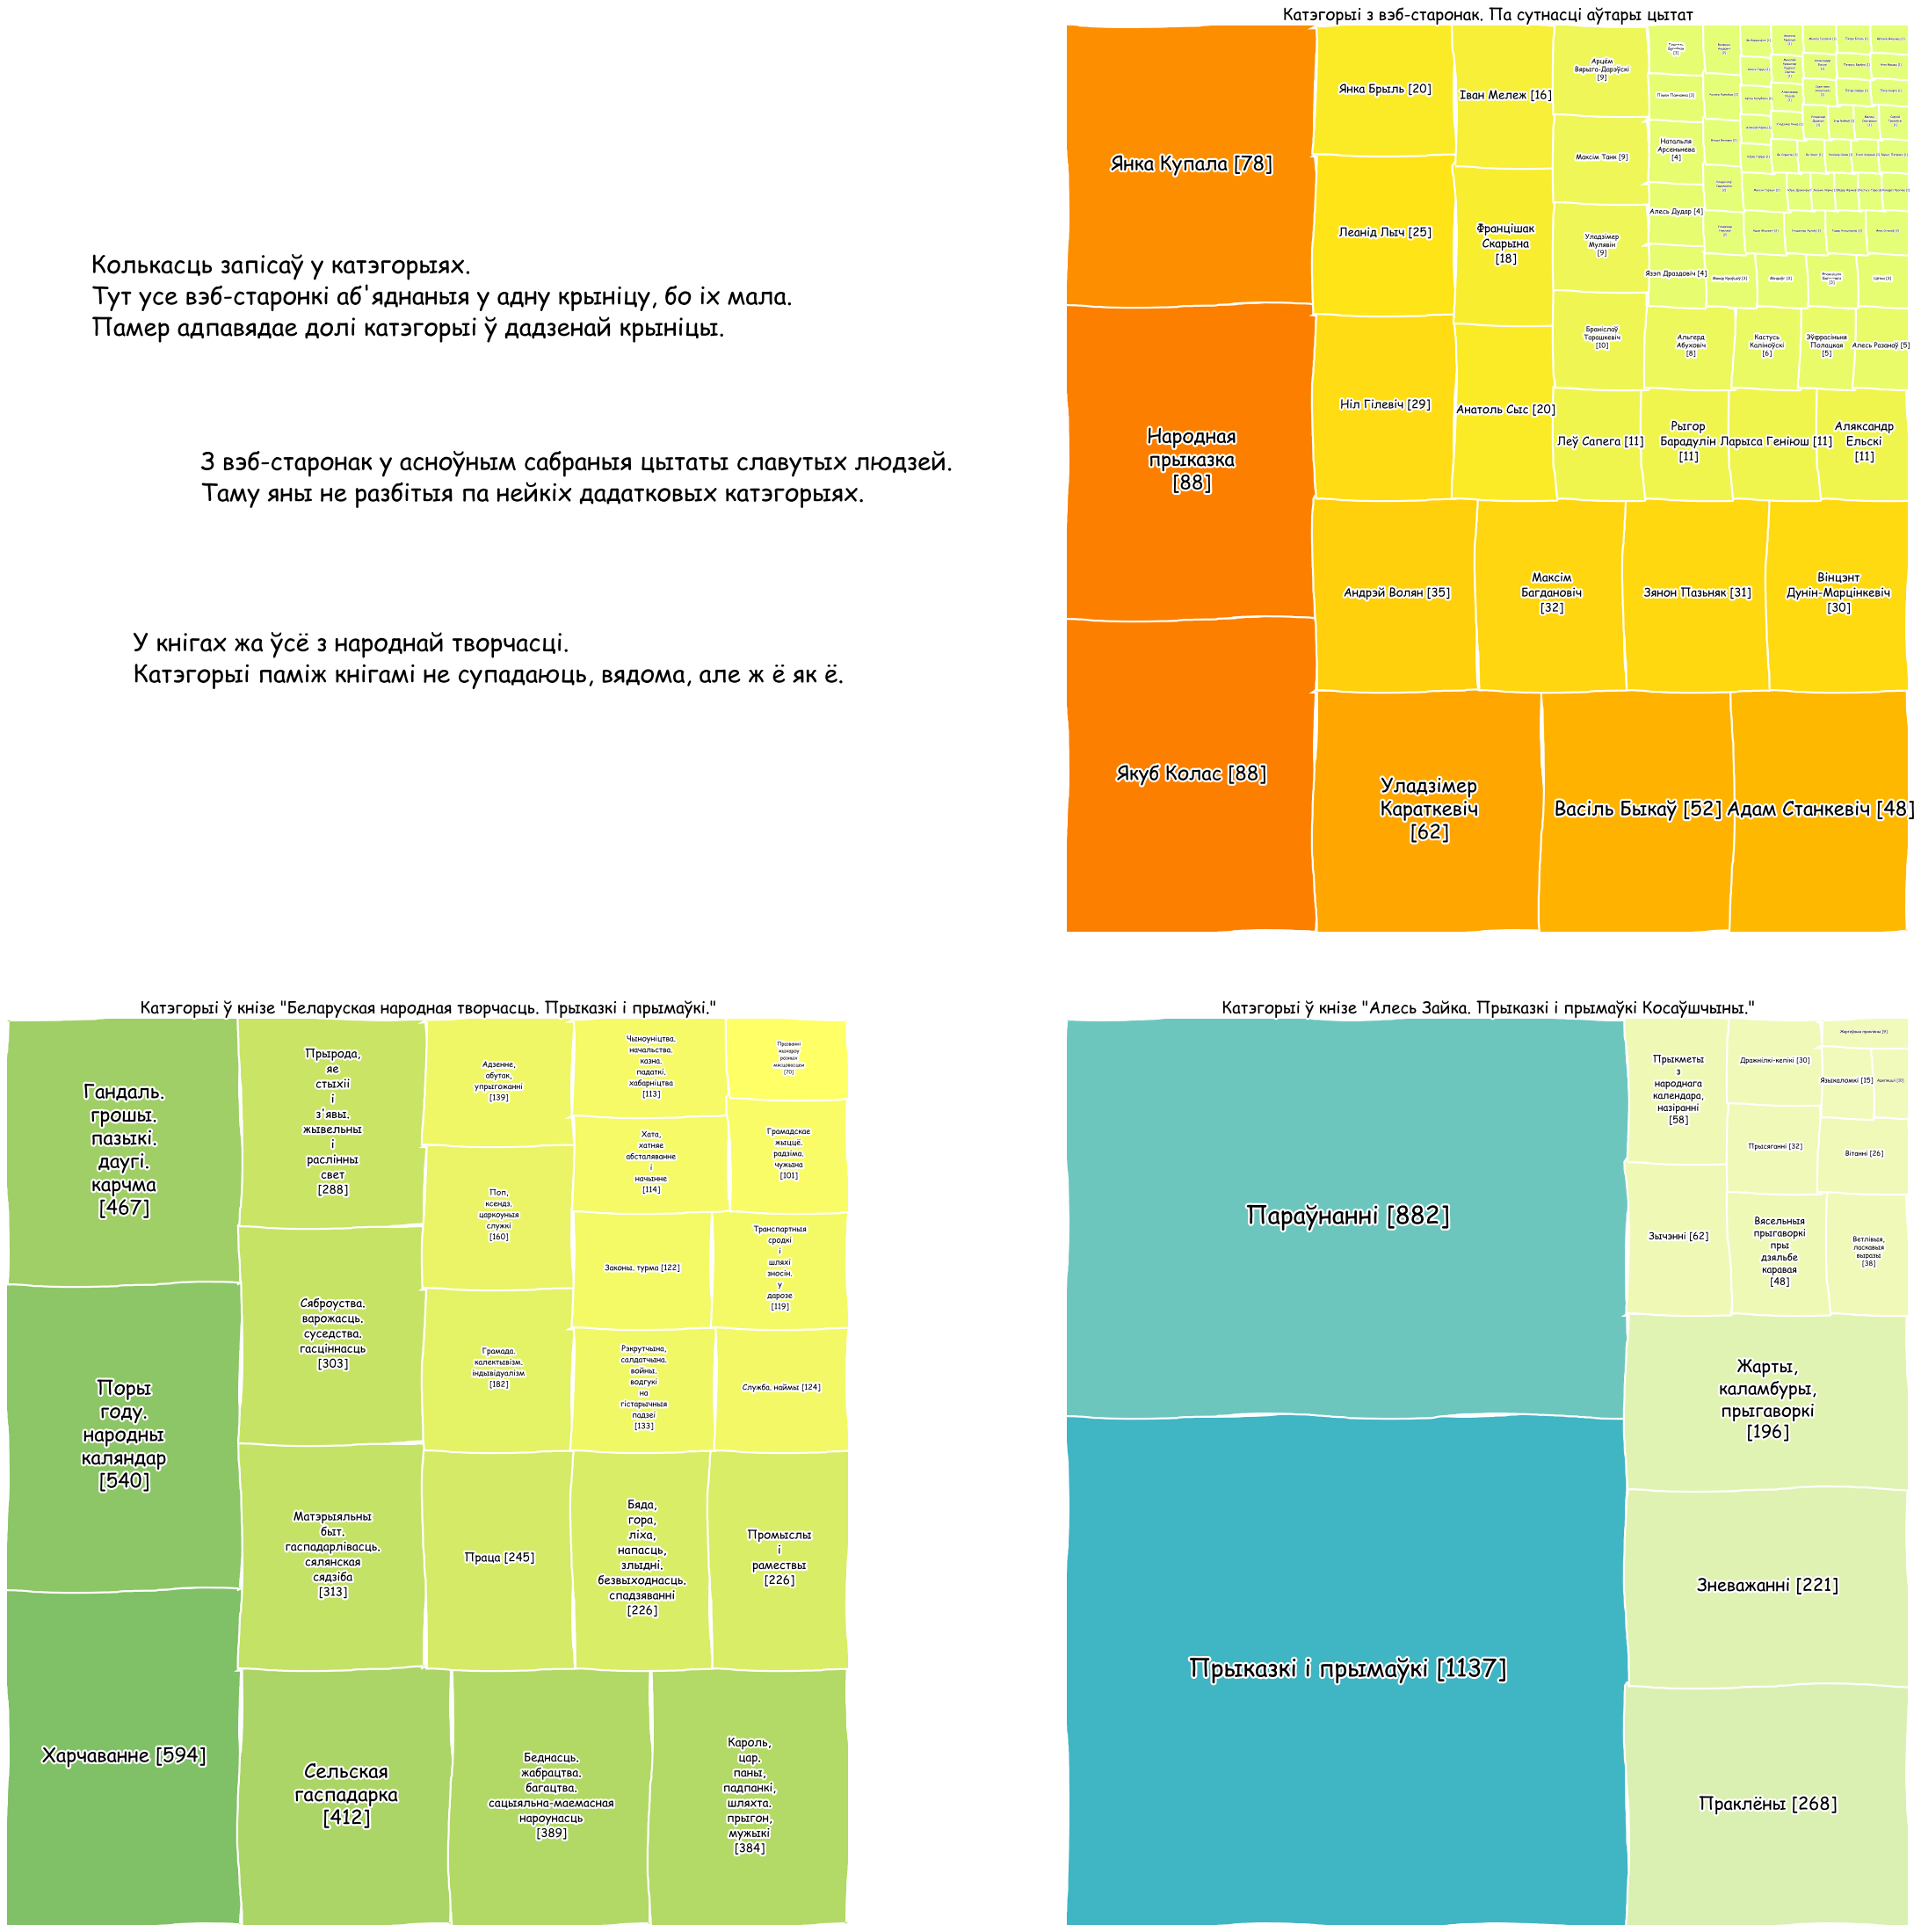

In [141]:
annot_1 = """Колькасць запісаў у катэгорыях. 
Тут усе вэб-старонкі аб'яднаныя у адну крыніцу, бо іх мала.
Памер адпавядае долі катэгорыі ў дадзенай крыніцы."""
annot_2 = """З вэб-старонак у асноўным сабраныя цытаты славутых людзей.
Таму яны не разбітыя па нейкіх дадатковых катэгорыях."""
annot_3 = """У кнігах жа ўсё з народнай творчасці. 
Катэгорыі паміж кнігамі не супадаюць, вядома, але ж ё як ё."""

with plt.xkcd(scale=3, length=2000, randomness=50):
    # fig = plt.figure()
    
    fig, axes = plt.subplots(2, 2, figsize=(30, 30), 
                             # gridspec_kw={'width_ratios': [1, 1, 1]}
                            )
    fig.dpi = 80

    ax = axes[0][0]
    ax.axis('off')
    ax.annotate(annot_1, 
                xy=(0.1, 0.7),
                xycoords='axes fraction', 
                va='center', 
                # ha='center',
                **{'fontsize': 25}
               )
    ax.annotate(annot_2, 
            xy=(0.23, 0.5),
            xycoords='axes fraction', 
            va='center', 
            # ha='center',
            **{'fontsize': 25}
           )

    ax.annotate(annot_3, 
        xy=(0.15, 0.3),
        xycoords='axes fraction', 
        va='center', 
        # ha='center',
        **{'fontsize': 25}
       )
    
    
    ax = axes[0][1]
    categories_amount = df.groupby(['source_type', 'category'])['phrase'].count().reset_index()
    categories_amount
    quotes_amount = categories_amount[categories_amount.source_type == 'webpage'][['category', 'phrase']]
    quotes_amount = quotes_amount.set_index('category')['phrase']
    quotes_amount = quotes_amount.sort_values(ascending=False)
    draw_squarified_webpages(quotes_amount, axes=ax)

    ax = axes[1][0]
    categories_amount = df.groupby(['source', 'category'])['phrase'].count().reset_index()
    categories_amount
    quotes_amount = categories_amount[categories_amount.source.str.contains('народная творчасць')][['category', 'phrase']]
    quotes_amount = quotes_amount.set_index('category')['phrase']
    quotes_amount = quotes_amount.sort_values(ascending=False)
    quotes_amount.index = [i.capitalize() for i in quotes_amount.index]
    draw_squarified_bnt(quotes_amount, 
                        # colormap=matplotlib.cm.cool, 
                        colormap=new_cmap,
                        axes=ax)

    ax = axes[1][1]
    categories_amount = df.groupby(['source', 'category'])['phrase'].count().reset_index()
    categories_amount
    quotes_amount = categories_amount[categories_amount.source.str.contains('Косаўшчыны')][['category', 'phrase']]
    quotes_amount = quotes_amount.set_index('category')['phrase']
    quotes_amount = quotes_amount.sort_values(ascending=False)
    quotes_amount.index = [i.capitalize() for i in quotes_amount.index]
    draw_squarified_zajka(quotes_amount,  
                          # colormap=matplotlib.cm.GnBu, 
                          colormap=new_cmap_zajka,
                          axes=ax)


    plt.tight_layout(pad=7.0, w_pad=3.0, h_pad=5.0)
    
    fig.savefig('imgs/category_ratio_squares.png', 
                dpi=300,
                transparent=True,
                metadata={'author': "https://github.com/aulasau"})

#### drawing tag cloud for categories

In [135]:
#!pip install wordcloud

In [136]:
from wordcloud import WordCloud, ImageColorGenerator

In [137]:
categories_text = '\n'.join(ctg for ctg in df.category)

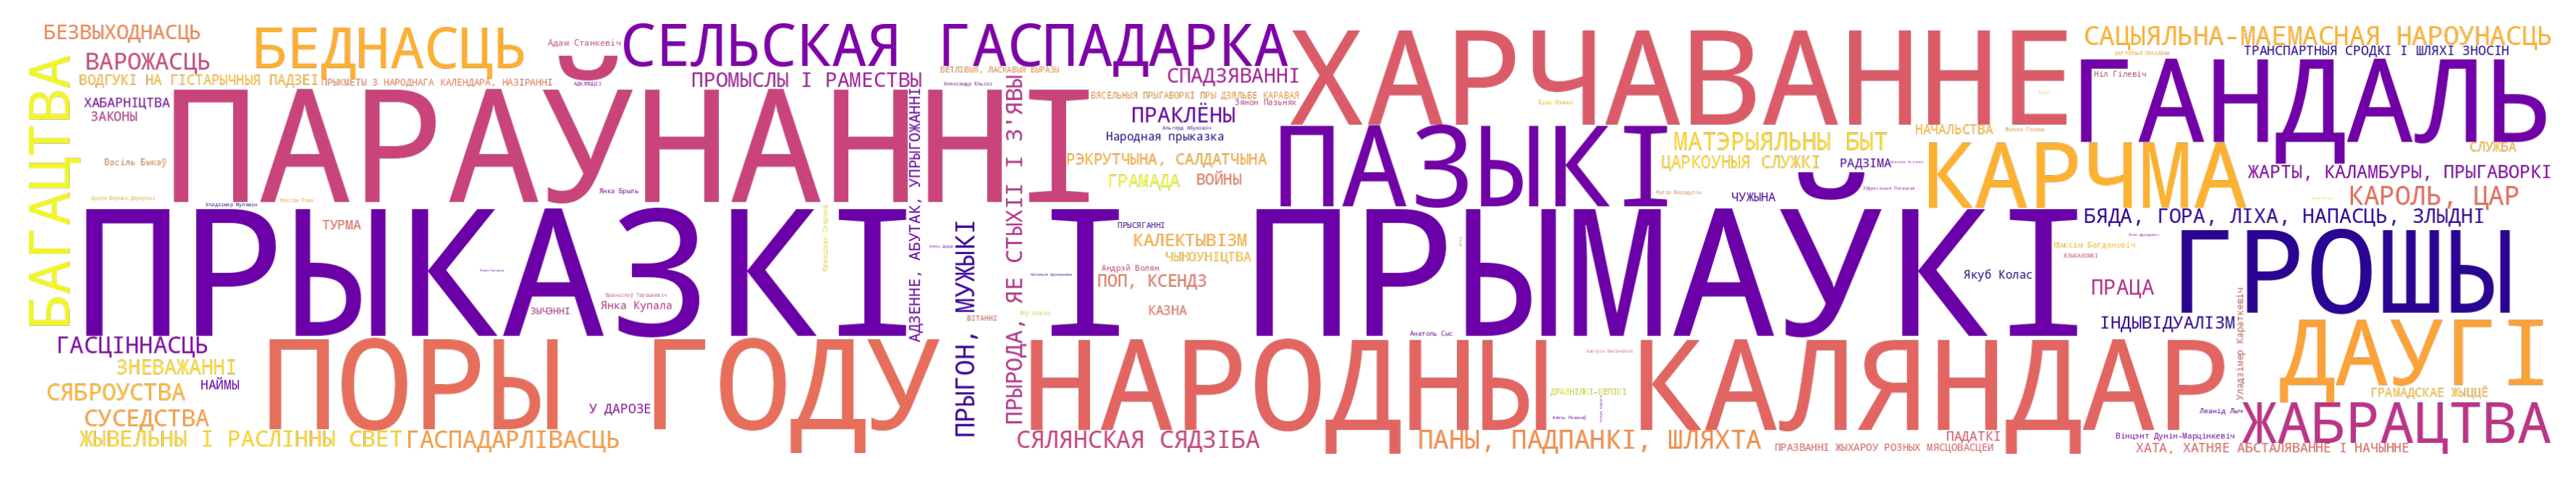

In [138]:
cloud = WordCloud(
        width=3500,
        height=600,
        # random_state=23,
        collocations=False,
        regexp='[^\.\n]+',# regexp='[^\n]+',
        mode='RGBA',
        colormap='plasma',
        background_color=None,
         ).generate(categories_text)

fig = plt.figure()
fig.dpi = 300
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [139]:
cloud.to_file('imgs/wordcloud_categories.png')

In [140]:
df.source.unique()

array(['svaboda.org', 'nlb.by', 'dumki.org',
       'Беларуская народная творчасць. Прыказкі і прымаўкі. У дзьвюх кнігах',
       'Алесь Зайка. Прыказкі і прымаўкі з Косаўшчыны'], dtype=object)